# Przewidywanie cukrzycy
### Zadanie polega na stworzeniu modelu do przewidywania czy dana osoba ma cukrzycę.
### Poniżej zostały przedstawione poszczególne etapy realizacji tego zadania - od wczytania danych po uczenie modelu i jego ocenę.
### Zbiór danych do zadania:
https://www.kaggle.com/uciml/pima-indians-diabetes-database
### Powodzenia! :)

# ------------------------------------------------------------------------------

### Wczytanie pakietów

In [73]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.feature_selection import SelectKBest, chi2
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, auc, roc_auc_score, roc_curve

In [2]:
#Download the datasets from https://www.kaggle.com/uciml/pima-indians-diabetes-database

!kaggle datasets download -d uciml/pima-indians-diabetes-database


  0%|          | 0.00/8.91k [00:00<?, ?B/s]
100%|██████████| 8.91k/8.91k [00:00<00:00, 4.58MB/s]


In [5]:
# Open the zip file and extract its contents to a folder

import zipfile

with zipfile.ZipFile('pima-indians-diabetes-database.zip', 'r') as zip_ref:
    zip_ref.extractall('pima-indians-diabetes-database')

## Eksploracja danych

#### Wczytanie zbioru danych

In [3]:
# Read the CSV file into a DataFrame

diabetes = pd.read_csv('pima-indians-diabetes-database/diabetes.csv')

#### Przegląd danych w zbiorze
##### Metody
1. head
2. info
3. shape
4. describe
5. value_counts

In [4]:
# Checking shape of the dataset  
print(diabetes.shape)

(768, 9)


In [5]:
# Checking first 5 rows of the dataset 
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
# Checking data types and non-null values
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
# Checking statistic details for numeric columns
print(diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

#### Sprawdzenie udziału poszczególnych kategorii targetu


In [8]:
# Checking the count of distinct values in Output column, where 0 means negative and 1 means positive for diabetes 

outcome_counts = diabetes['Outcome'].value_counts()

outcome_percentage = outcome_counts / outcome_counts.sum() * 100

print(outcome_counts)
print(outcome_percentage)

0    500
1    268
Name: Outcome, dtype: int64
0    65.104167
1    34.895833
Name: Outcome, dtype: float64


Note: From the results above we can see that negative results are significantly more frequent than positive. This pose a challange to machine learning model and will need to be addressed so the model does not bias towards predicting that patients do not have diabetes. 

#### Wykresy
1. Pudełko
2. Histogram

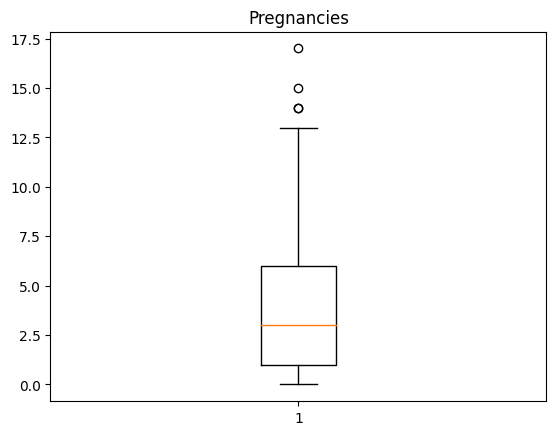

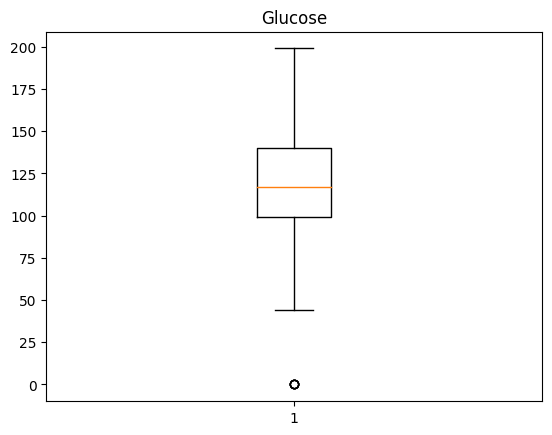

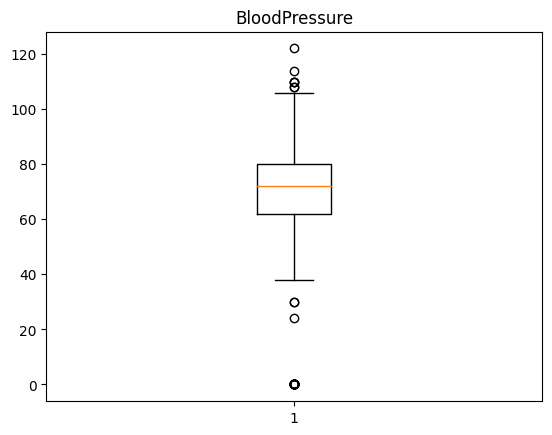

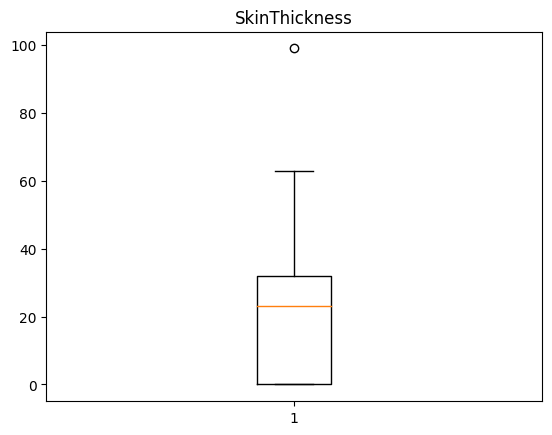

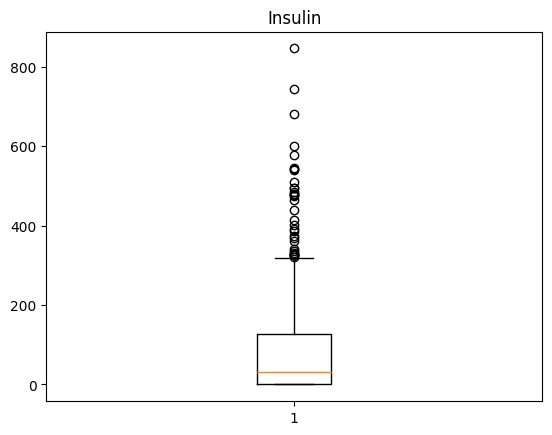

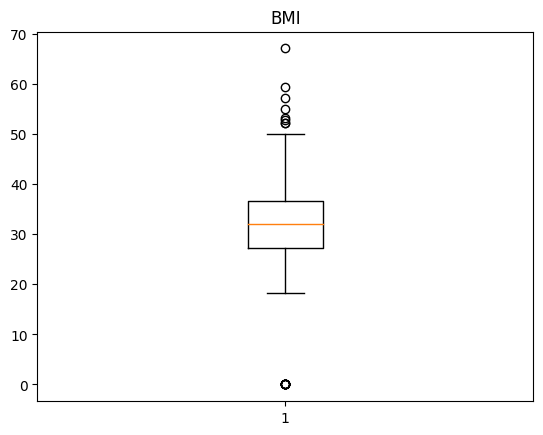

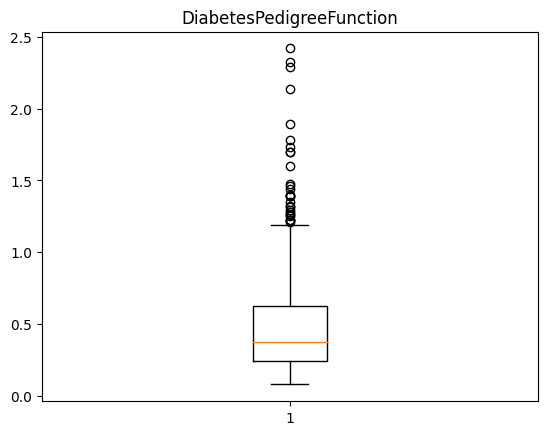

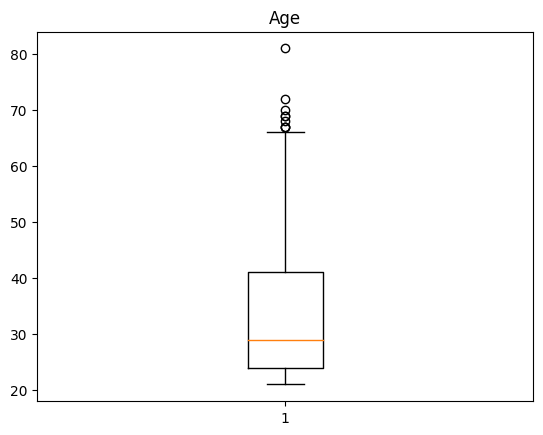

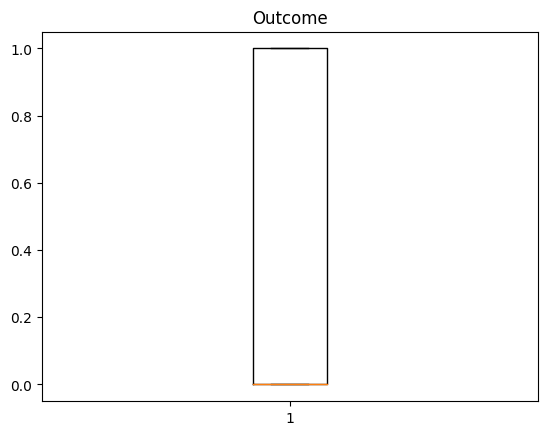

In [9]:
# Creating boxplots for each column to identify outliers and visualise the dataset  
for column in diabetes.columns:
    plt.figure()
    plt.boxplot(diabetes[column])
    plt.title(column)
    plt.show()

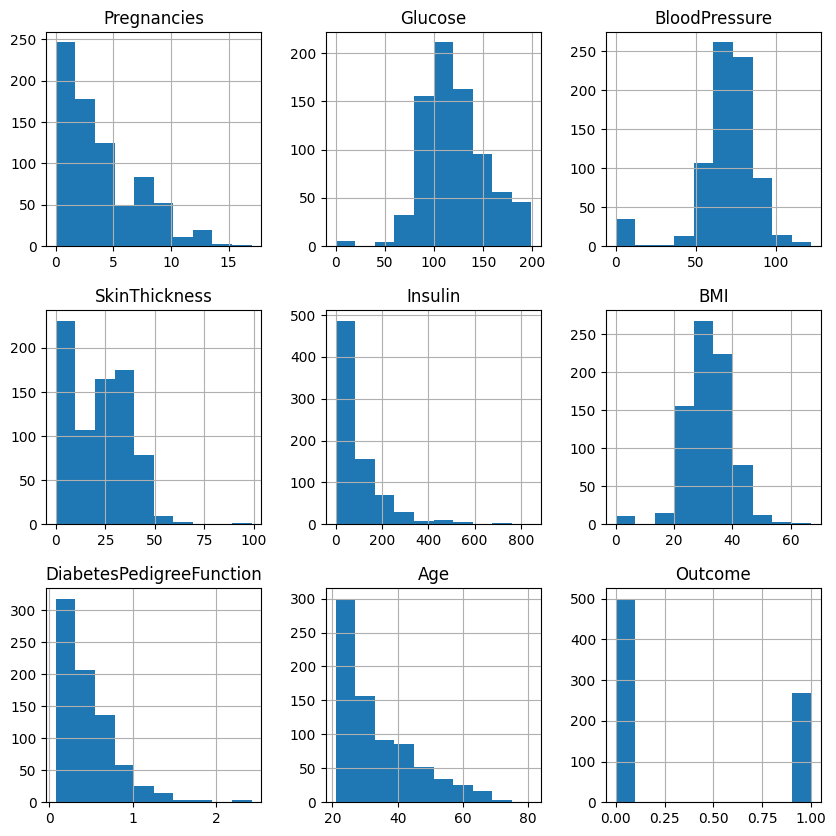

In [10]:
# Creating histograms to check the data distribution 
diabetes.hist(figsize=(10,10))
plt.show()

#### Sprawdzenie braków danych

In [11]:
# Checking 0 values in columns where 0 does not really make sense - it should rather be a null value to represent lack of measurment 
# Columns where 0 does not make sense are: Glucose, BloodPressure, SkinThickness, Insulin, BMI

columns_where_0_means_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_columns_where_0_means_null = diabetes.loc[:,columns_where_0_means_null]

count_zeros = (df_columns_where_0_means_null == 0).sum()

count_zeros

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Here we see that approx 30% of cases are missing skin thickness measurment and almost 49% are missing insulin measurment. This is quite a gap which can significantly impact the model results and therefore it was decide to remove those columns from further analysis. Filling those gaps with dummay values could significantly impact the model results. 

For the rest of 0 as those are insiginificant gaps, the 0 will be replaced with mean values to allow proper measurment. 

In [20]:
# Removing columns from the dataset
diabetes_clean = diabetes.drop(['SkinThickness', 'Insulin'],axis=1)

diabetes_clean

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [21]:
# Replacing 0 with mean numbers to cover for measurment gaps

columns_0_to_mean = ['Glucose', 'BloodPressure', 'BMI']
means = diabetes_clean[diabetes_clean[columns_0_to_mean] != 0][columns_0_to_mean].mean()

for column in columns_0_to_mean:
    diabetes_clean[column] = diabetes_clean[column].replace(0, means[column])

print(diabetes_clean.head())



   Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0            6    148.0           72.0  33.6                     0.627   50   
1            1     85.0           66.0  26.6                     0.351   31   
2            8    183.0           64.0  23.3                     0.672   32   
3            1     89.0           66.0  28.1                     0.167   21   
4            0    137.0           40.0  43.1                     2.288   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1  


Creating barcharts and histograms for the updated data

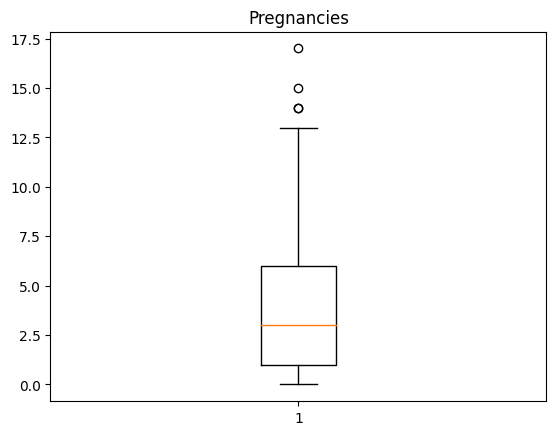

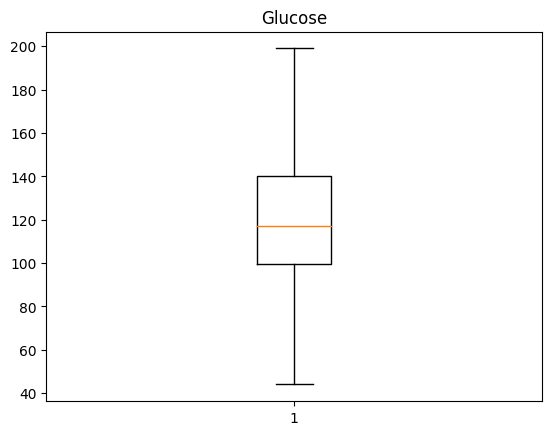

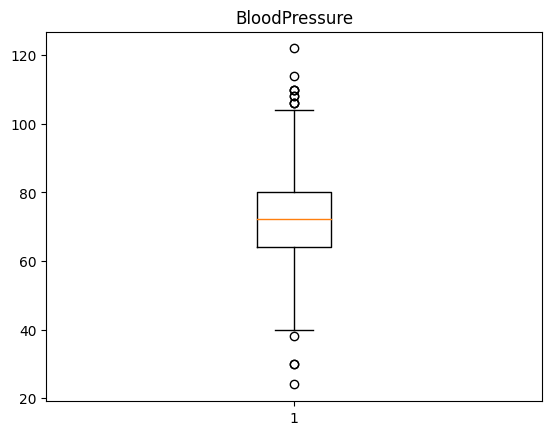

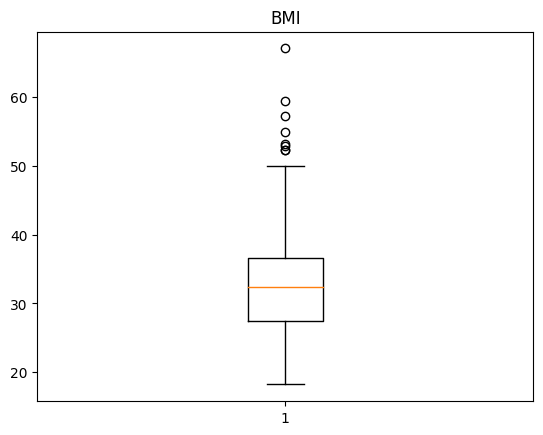

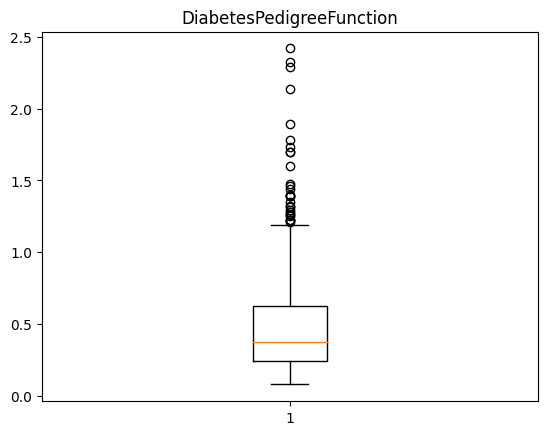

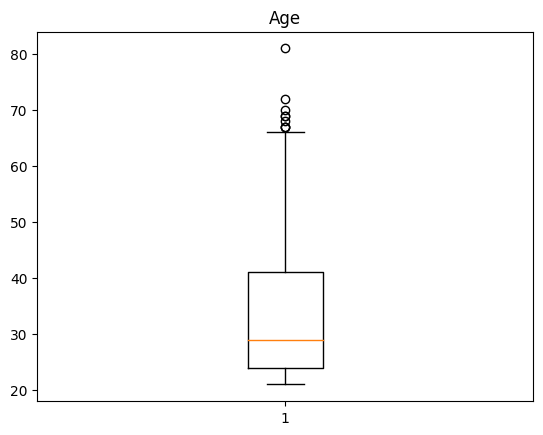

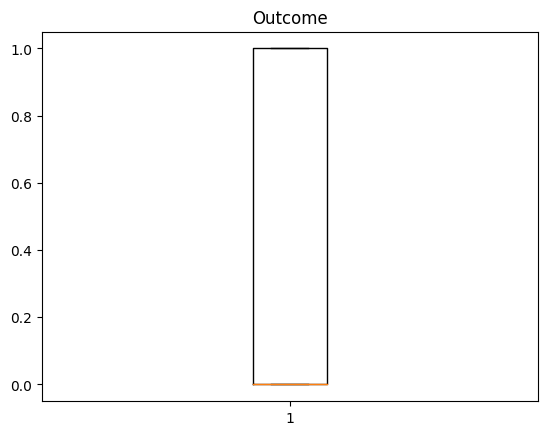

In [22]:
# Creating boxplots for each column to identify outliers and visualise the dataset  
for column in diabetes_clean.columns:
    plt.figure()
    plt.boxplot(diabetes_clean[column])
    plt.title(column)
    plt.show()

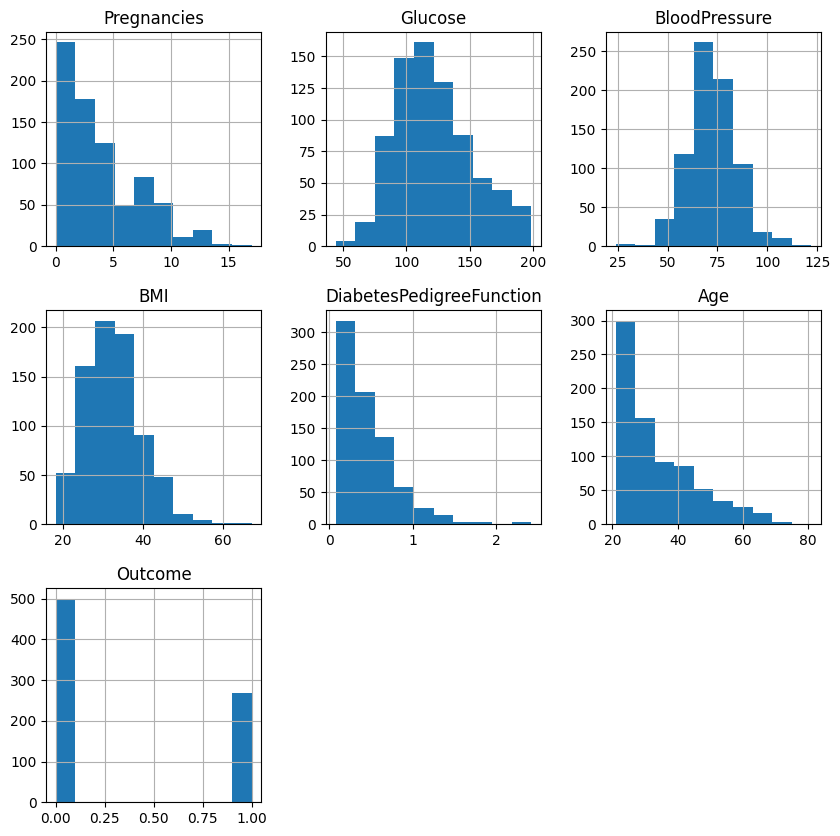

In [23]:
# Creating histograms to check the data distribution 
diabetes_clean.hist(figsize=(10,10))
plt.show()

#### Korelacja

<Axes: >

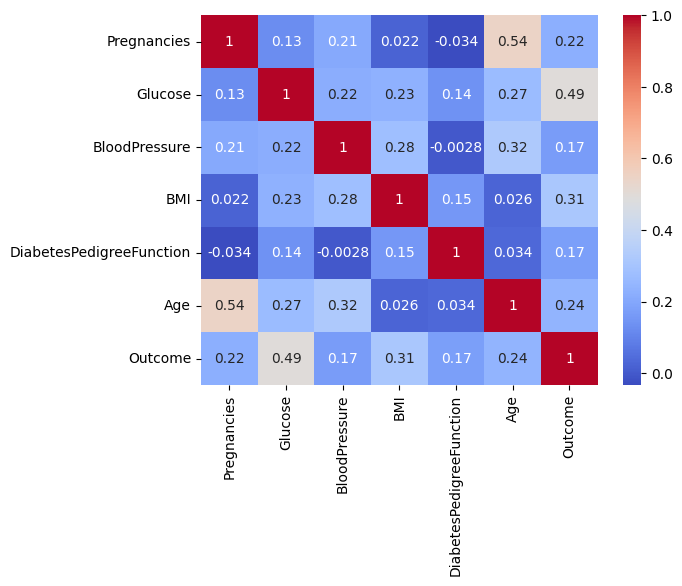

In [25]:
# Creating correlation matrix
corr_matrix = diabetes_clean.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

#### Zbadanie zależności zmiennych na target

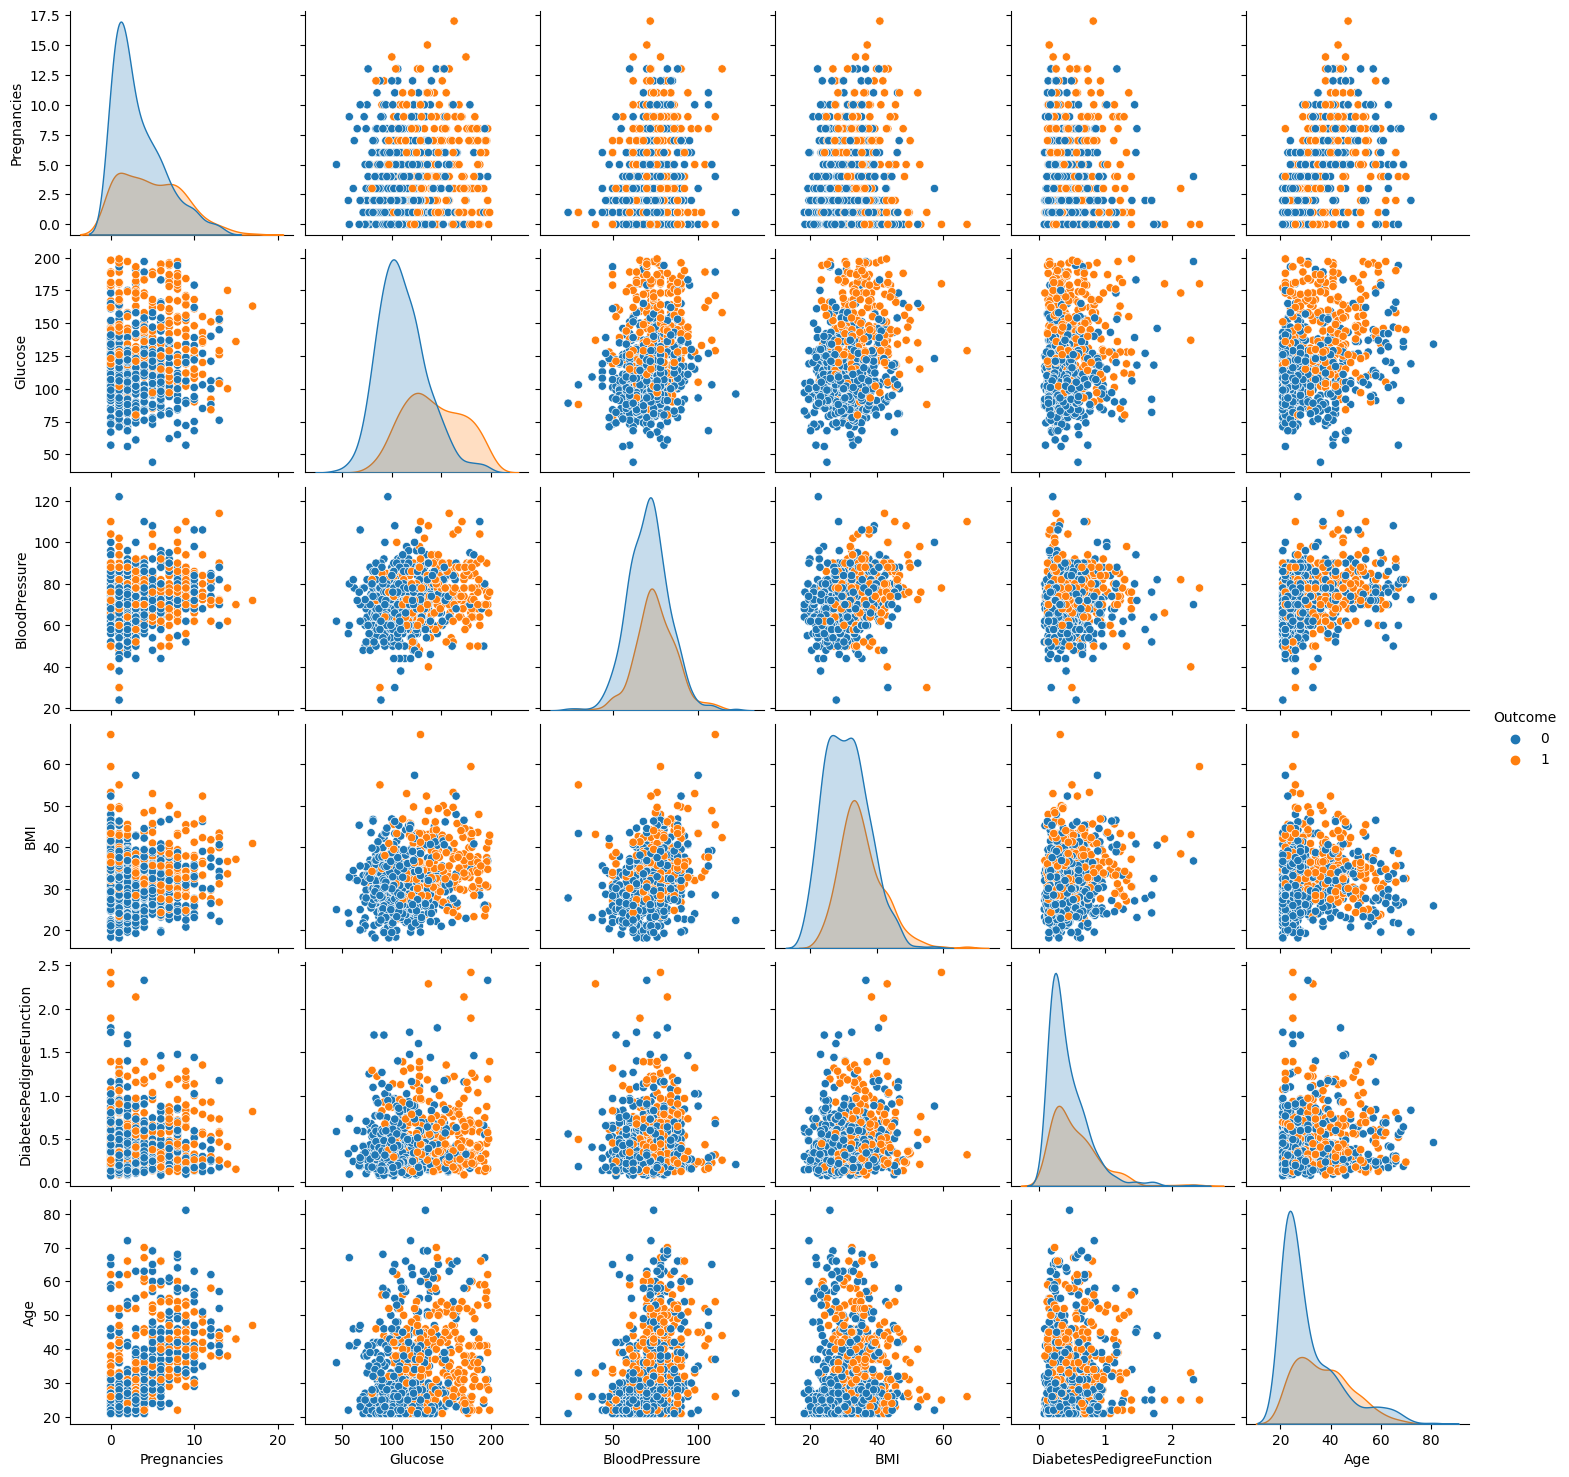

In [26]:
p=sns.pairplot(diabetes_clean, hue = 'Outcome')

## Feature Engineering i przygotowanie zbiorów

#### Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych na target

In [57]:
# Model will take into consideration all columns from the clean dataset 
diabetes_clean.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [36]:
# Scaling the data
scaler = StandardScaler()

cols_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_clean[cols_to_scale]

X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=cols_to_scale)

X_scaled_df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,0.064409,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,0.632039,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.910750,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.343120,-0.371101,1.170732


#### Podział zbioru na treningowy i testowy

In [76]:
# Creating a training and test data sets:
X = diabetes_clean.drop('Outcome', axis=1) # features
y = diabetes_clean['Outcome'] # target

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

print("Training set size (features): ", X_train.shape)
print("Test set size (features): ", X_test.shape)
print("Training set size (target variable): ", y_train.shape)
print("Test set size (target variable): ", y_test.shape)


Training set size (features):  (537, 6)
Test set size (features):  (231, 6)
Training set size (target variable):  (537,)
Test set size (target variable):  (231,)


#### Analiza głównych składowych (PCA)

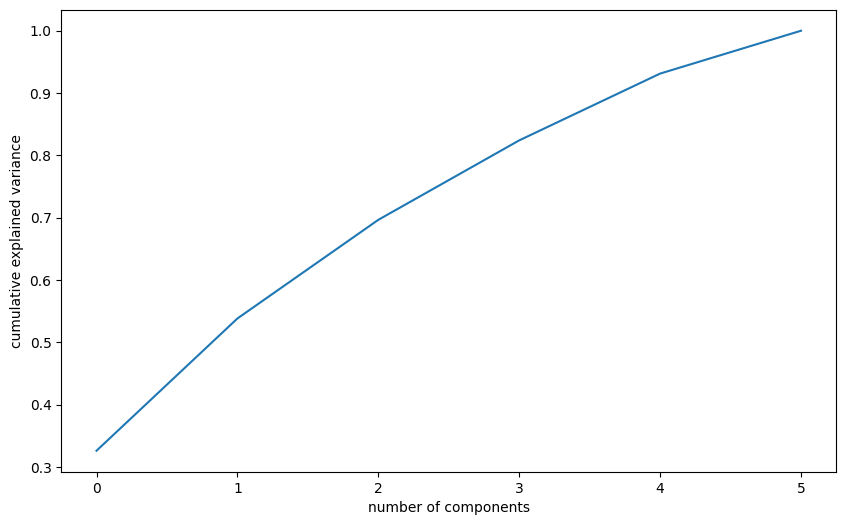

In [77]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled_df)
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [78]:
pca = PCA(svd_solver='full', n_components=0.9)

principal_components = pca.fit_transform(X_scaled_df)
principal_df1 = pd.DataFrame(data=principal_components)
principal_df1.head()

,0,1,2,3,4
0,1.522448,-0.163615,0.801964,0.365880,0.200183
1,-1.517328,-0.674022,-0.043780,-0.338519,-0.412123
2,0.714522,-0.456185,1.675634,1.736549,0.045687
3,-1.931635,-0.499497,-0.695476,-0.076943,-0.117726
4,-0.593702,3.982370,4.695348,-0.955357,1.030262


In [79]:
# Creating a training and test data sets for PCA
cols_pca = ['Pregnancies', 'Glucose','BMI','Age']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(diabetes_clean[cols_pca], diabetes_clean['Outcome'], test_size=0.3, random_state=42)

print("Training set size (features): ", X_train_pca.shape)
print("Test set size (features): ", X_test_pca.shape)
print("Training set size (target variable): ", y_train_pca.shape)
print("Test set size (target variable): ", y_test_pca.shape)

Training set size (features):  (537, 4)
Test set size (features):  (231, 4)
Training set size (target variable):  (537,)
Test set size (target variable):  (231,)


### Estymacja modelu klasyfikacyjnego - drzewa decyzyjne

Wyestymuj dwa modele - jeden na wytypowanych przez Ciebie danych, a drugi na PCA.

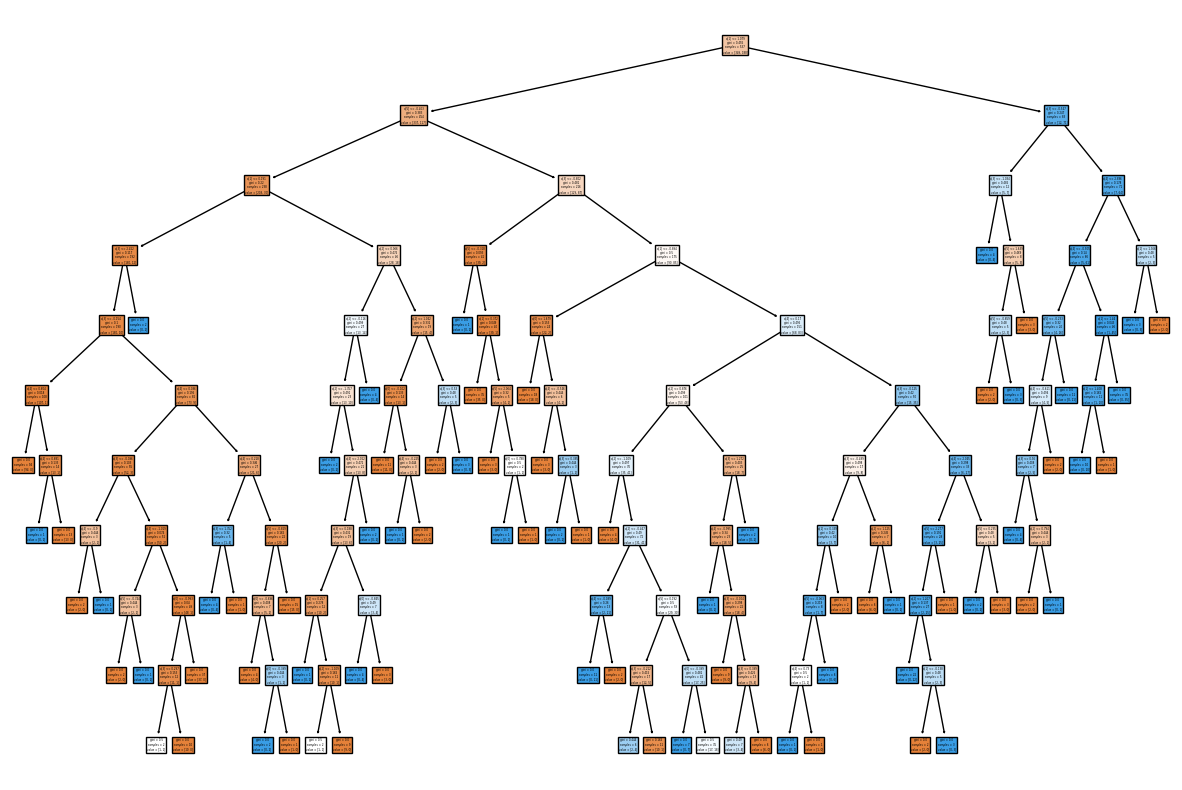

In [80]:
# Train the decision tree classifier
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10)
tree_classifier.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(tree_classifier, filled=True, ax=ax)
plt.show()

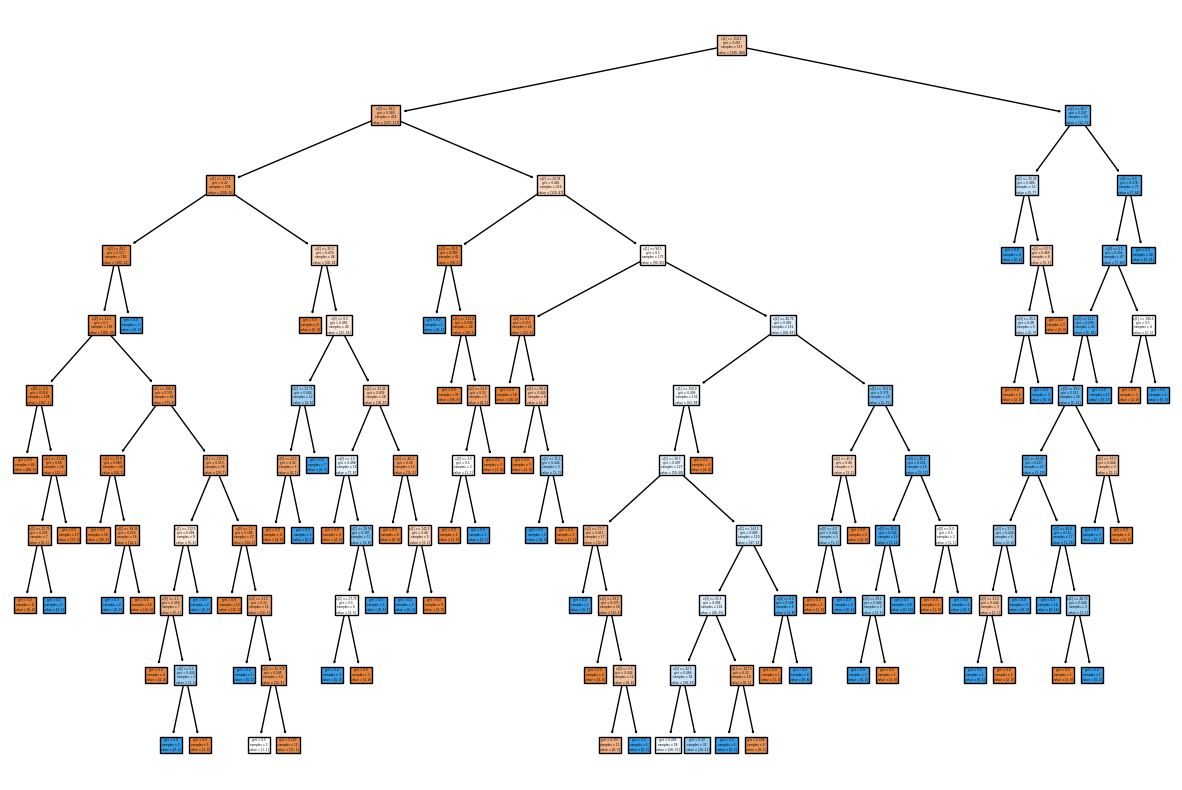

In [86]:
# Train the decision tree classifier on PCA
tree_classifier_pca = DecisionTreeClassifier(criterion='gini', max_depth=10)
tree_classifier_pca.fit(X_train_pca, y_train_pca)

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(tree_classifier_pca, filled=True, ax=ax)
plt.show()

### Estymacja modelu klasyfikacyjnego - lasy losowe

Wyestymuj dwa modele - jeden na wytypowanych przez Ciebie danych, a drugi na PCA.

In [82]:
# Train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [83]:
# Train the random forest classifier for PCA
rf_classifier_pca = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
rf_classifier_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier(max_depth=10)

### Ocena jakości modelu klasyfikacyjnego

Wyznacz accuracy, precision, lub inne miary znane Ci z zajęć, które uznasz za stosowne. Porównaj wyniki dla wszystkich modeli na odpowiednim zbiorze testowym.

In [96]:
models = {
    'Decision Tree': tree_classifier,
    'Decision Tree PCA': tree_classifier_pca,
    'Random Forest': rf_classifier,
    'Random Forest PCA': rf_classifier_pca
}

X_test_sets = {
    'Decision Tree': X_test,
    'Decision Tree PCA': X_test_pca,
    'Random Forest': X_test,
    'Random Forest PCA': X_test_pca
}

results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_name, model in models.items():
    
    X_test_current = X_test_sets[model_name]
    if 'PCA' in model_name:
        X_test_current = X_test_current[cols_pca] # update feature names for decision tree models
    y_pred = model.predict(X_test_current)
    
    results.loc[model_name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]

print("Models Comparison")
display(results.style.format("{:.6f}"))


Models Comparison


,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.709957,0.560748,0.750000,0.641711
Decision Tree PCA,0.675325,0.524752,0.662500,0.585635
Random Forest,0.761905,0.647059,0.687500,0.666667
Random Forest PCA,0.748918,0.630952,0.662500,0.646341


Based on the results, we can see that the Random Forest model outperformed the Decision Tree model in terms of all evaluation metrics, including accuracy, precision, recall, and F1 score.

Additionally, we can see that the models with PCA performed worse than the models without PCA, which suggests that applying PCA to the dataset before training the model did not improve its performance.